In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

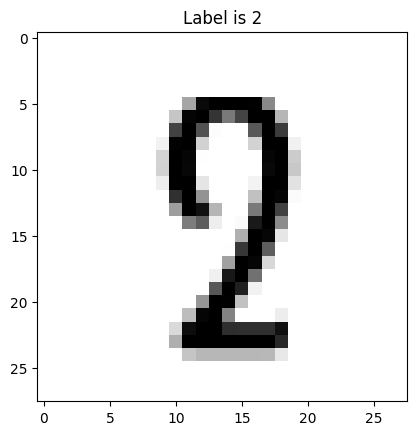

In [10]:
# Read the CSV file into a DataFrame
df = pd.read_csv('TMNIST_Data.csv')

#drop 'names'
df = df.drop('names', axis=1)

# Iterate over the DataFrame rows
for index, row in df.iterrows():
    # The first column is the label
    label = row[0]

    # The rest of columns are pixels
    pixels = row[1:].values

    # Make those columns into a array of 8-bits pixels
    # This array will be of 1D with length 784
    # The pixel intensity values are integers from 0 to 255
    pixels = np.array(pixels, dtype='uint8')

    # Reshape the array into 28 x 28 array (2-dimensional array)
    pixels = pixels.reshape((28, 28))

    # Plot
    plt.title('Label is {label}'.format(label=label))
    plt.imshow(pixels, cmap='gray_r')  # Use 'gray_r' to invert the colors
    plt.show()

    break  # This stops the loop, I just want to see one
